In [1]:
import resnet, data, numpy as np, matplotlib.pyplot as plt

def show_batch(ds, denormalize=True):
    plt.figure(figsize=(12,10))
    for i, (image, label) in enumerate(ds.take(12)):
        #im = np.clip(image.numpy(), 0, 255)
        if denormalize:
            image = resnet.Preprocessing.denormalize(image)
        
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image.numpy().astype(np.uint8))         
        plt.title(label.numpy())
        plt.axis('off')
                
_, _, ds, _ = data.Imagenet2012.load_data(sample_fraction=0.001, only_one=True, shuffle_files=False)

Loading input dataset
A fraction of 0.001 was selected from the total data
Number of examples in the Train dataset is 1 and in the Validation dataset is 1


#### Original image:

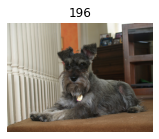

In [2]:
ds_original=ds.map(lambda r: (r['image'], r['label']))
show_batch(ds_original, denormalize=False)

#### The image after train augmentation
We want to see that the augmentation components work (or don't create exagerated results): 
- resizing and keeping the image ratio & crops with random offsets;
- image flipping;
- brightness and contrast

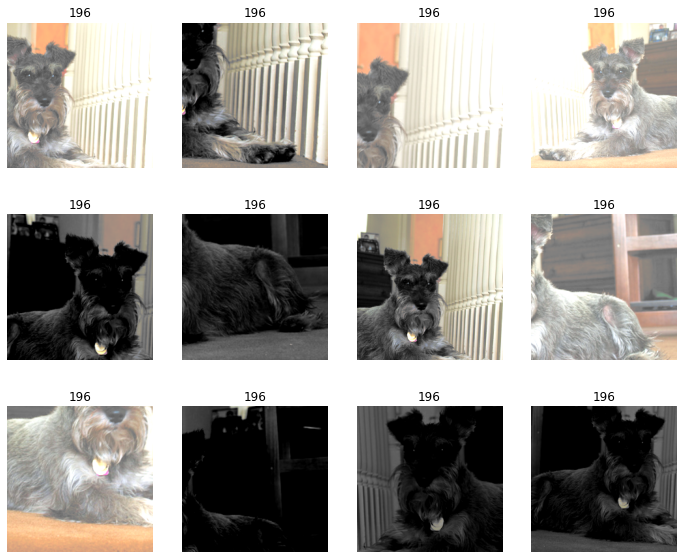

In [3]:
ds_train_augmented = resnet.Preprocessing.create_generator(
                ds, for_training=True, batch_size=5, buffer_size=1).unbatch()
show_batch(ds_train_augmented)

#### The 10 image crops prepared for testing

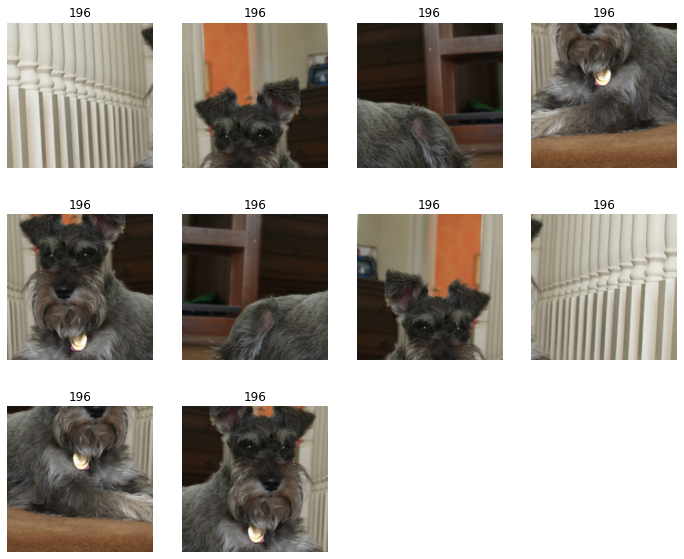

In [6]:
ds_valid_gen = resnet.Preprocessing.create_generator(ds, for_training=False, 
                    batch_size=None).unbatch()
show_batch(ds_valid_gen)